# Librerias

In [2]:
import os

In [3]:
import pandas as pd
import numpy as np

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit

In [5]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, ElasticNet
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from functools import partial

In [6]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [7]:
from sklearn.metrics import mean_absolute_percentage_error

In [8]:
import plotly.express as px
from lightgbm import plot_importance

In [9]:
import warnings
warnings.filterwarnings("ignore")
random_state = 1601

In [10]:
'''Customize visualization
Seaborn and matplotlib visualization.'''
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style({'axes.grid':False}) 

# Cargar data

In [11]:
test_fe = pd.read_csv('C:/Users/Admin/Desktop/wallmart/walmart_forecasting/2023/finally-datascience/finally-datascience/generated_data_bike/test.csv')
train_fe = pd.read_csv('C:/Users/Admin/Desktop/wallmart/walmart_forecasting/2023/finally-datascience/finally-datascience/generated_data_bike/train.csv')
y_train = pd.read_csv('C:/Users/Admin/Desktop/wallmart/walmart_forecasting/2023/finally-datascience/finally-datascience/generated_data_bike/y_train_se.csv')

In [12]:
test_fe.head(5)

date_observacional  holiday  workingday  weathersit      temp     atemp  \
0         2012-11-01        0           0           2  0.365833  0.369942   
1         2012-11-02        0           0           2  0.355000  0.356042   
2         2012-11-03        0           1           1  0.343333  0.323846   
3         2012-11-04        0           1           1  0.325833  0.329538   
4         2012-11-05        0           1           1       NaN  0.308075   

        hum  windspeed  rents  mean_temp_last_3_days  ...  \
0  0.581667   0.157346    466               0.347172  ...   
1  0.522083   0.266175    618               0.349129  ...   
2  0.491250   0.270529   1029               0.355417  ...   
3  0.532917   0.179108   1201               0.347500  ...   
4       NaN   0.236325    378               0.341389  ...   

   mean_windspeed_last_15_days  max_windspeed_last_15_days  \
0                     0.174464                    0.398008   
1                     0.184764                    0.398008   
2                     0.186864                    0.398008   
3                     0.189623                    0.398008   
4                     0.197048                    0.398008   

   stddev_windspeed_last_15_days  var_windspeed_last_15_days  \
0                       0.094192                    0.008872   
1                       0.094676                    0.008964   
2                       0.096269                    0.009268   
3                       0.095310                    0.009084   
4                       0.093937                    0.008824   

   min_windspeed_last_15_days  mean_rents_last_15_days  \
0                    0.072779                1051.0000   
1                    0.072779                1028.4375   
2                    0.072779                1029.7500   
3                    0.072779                1057.7500   
4                    0.072779                 906.0000   

   max_rents_last_15_days  stddev_rents_last_15_days  var_rents_last_15_days  \
0                     998                 810.746816             657310.4000   
1                     998                 817.875946             668921.0625   
2                     998                 817.857812             668891.4000   
3                     998                 815.416581             664904.2000   
4                     998                 683.656639             467386.4000   

   min_rents_last_15_days  
0                    1008  
1                    1008  
2                    1029  
3                    1029  
4                    1029  

[5 rows x 84 columns]

In [13]:
train_fe.head(5)

date_observacional  holiday  workingday  weathersit      temp     atemp  \
0         2011-01-15        0           1           1  0.233333  0.248112   
1         2011-01-16        0           1           1  0.231667       NaN   
2         2011-01-17        0           1           1  0.175833  0.176771   
3         2011-01-18        0           1           1  0.216667  0.232333   
4         2011-01-19        0           1           1  0.292174  0.298422   

        hum  windspeed  rents  mean_temp_last_3_days  ...  \
0  0.498750   0.157963    222               0.182982  ...   
1  0.483750   0.188433    251               0.197717  ...   
2  0.537500   0.194017    117               0.200426  ...   
3  0.861667   0.146775      9               0.214375  ...   
4  0.741739   0.208317     78               0.229085  ...   

   mean_windspeed_last_15_days  max_windspeed_last_15_days  \
0                     0.214323                     0.36195   
1                     0.212597                     0.36195   
2                     0.214835                     0.36195   
3                     0.208051                     0.36195   
4                     0.205385                     0.36195   

   stddev_windspeed_last_15_days  var_windspeed_last_15_days  \
0                       0.077715                    0.006040   
1                       0.075185                    0.005653   
2                       0.074013                    0.005478   
3                       0.075354                    0.005678   
4                       0.074531                    0.005555   

   min_windspeed_last_15_days  mean_rents_last_15_days  \
0                    0.089565               103.533333   
1                    0.089565               112.750000   
2                    0.089565                99.375000   
3                    0.089565                91.750000   
4                    0.089565                89.125000   

   max_rents_last_15_days  stddev_rents_last_15_days  var_rents_last_15_days  \
0                      88                  81.814133             6693.552381   
1                      88                  87.215060             7606.466667   
2                      88                  65.125392             4241.316667   
3                       9                  68.243193             4657.133333   
4                       9                  67.890967             4609.183333   

   min_rents_last_15_days  
0                     108  
1                     108  
2                     108  
3                     108  
4                     108  

[5 rows x 84 columns]

In [14]:
y_train.head(5)

date_observacional  rents
0         2011-01-15    208
1         2011-01-16    140
2         2011-01-17    218
3         2011-01-18    259
4         2011-01-19    579

In [15]:
test_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date_observacional             31 non-null     object 
 1   holiday                        31 non-null     int64  
 2   workingday                     31 non-null     int64  
 3   weathersit                     31 non-null     int64  
 4   temp                           29 non-null     float64
 5   atemp                          30 non-null     float64
 6   hum                            29 non-null     float64
 7   windspeed                      30 non-null     float64
 8   rents                          31 non-null     int64  
 9   mean_temp_last_3_days          31 non-null     float64
 10  max_temp_last_3_days           31 non-null     float64
 11  stddev_temp_last_3_days        31 non-null     float64
 12  var_temp_last_3_days           31 non-null     float

# Como se comporta la serie

In [16]:
px.line(y_train, x='date_observacional', y='rents')

In [18]:
def prediction_plan(prediction, test, metric: mean_absolute_percentage_error):   
    plt.figure(figsize=(12, 6))
    plt.plot(test.index, test, label='Datos reales', linestyle='-')
    plt.plot(test.index, prediction, label='Predicciones', linestyle='--')
    plt.xlabel('Fecha')
    plt.ylabel('Valor de la serie de tiempo')
    plt.title('Gráfico de Serie de Tiempo y Predicciones')
    plt.legend()
    plt.show()

def train_get_score_cv(x_train: pd.DataFrame, y_train: pd.Series, models, 
                       pipeline_engine: Pipeline, features_selected: list=None,
                       k=5, random_state=199) -> pd.DataFrame:
    """
    Obtiente el mape como métrica usando cross validation kfold. El cross validation sirve para simular como 
    el modelo reacciona a datos no observados.
    
    Input:
    x_train[pd.DataFrame]: dataframe que contiene las variables explicativas a entrar en el modelo.
    y_train[pd.Series]: Vector que contiene la variable respuesta.
    models[dict]: Diccionario con los modelos a ser entrenados y evaluados.
    pipeline_engine[Pipeline]: sklearn pipeline --> funciones a ser procesadas en el conjunto de entrenamiento
    k[int]: número de folds en el cross validation
    
    Return:
    Un dataframe con los modelos y la métrica para cada modelo
    """
    if features_selected is None:
        features_selected = x_train.columns
        
    kf = TimeSeriesSplit(n_splits=k, test_size=30)
    result = np.zeros((len(models), 1))
    
    for i,model in enumerate(models.keys()):
    
        mape_metric = []

        learner = models[model]
        print(f'Model: {list(models.keys())[i]}')
        for fold, (id_train, id_test) in enumerate(kf.split(x_train, y_train)):

            Xt = x_train.iloc[id_train]; yt = y_train.iloc[id_train]
            Xv = x_train.iloc[id_test]; yv = y_train.iloc[id_test]
            if pipeline_engine != None:
                preprocess_data_cv = pipeline_engine.fit(Xt, yt)
    
                Xt = preprocess_data_cv.transform(Xt)
                features_selected = Xt.columns
                Xv = preprocess_data_cv.transform(Xv)
            learner.fit(Xt[features_selected], yt.values)
            prediction = pd.Series(learner.predict(Xv[features_selected]), index=Xv.index)   
            mape_fold =  mean_absolute_percentage_error(yv, prediction)
            mape_metric.append(mape_fold)
            print(f'Fold {fold}: Best mape score: {mape_fold}')
            
            prediction_plan(prediction, yv,
                metric=mean_absolute_percentage_error)
                                 
        mape_opt = np.mean(mape_metric)
        
        result[i] = [mape_opt]
    result = pd.DataFrame(result, columns=["MAPE"],index = list(models.keys()))

    return result

def feature_importance_series(train: pd.DataFrame, 
                    y_train: pd.Series, learner = LGBMRegressor()
                    ) -> pd.Series:
    """Retorna un vector de variables ordenadas por su importancia de forma descendiente.
       Toma en consideración la importancia de las variables usando LGBM
    """
    learner.fit(train,y_train.loc[train.index])
    list_features_imp = pd.Series(learner.feature_importances_ / learner.feature_importances_.sum(), index=train.columns).sort_values(ascending=False)
    return list_features_imp

# Improving model

In [19]:
from dateutil.relativedelta import relativedelta
from sklearn.base import BaseEstimator, TransformerMixin

class AggDatesFe(BaseEstimator, TransformerMixin):
    """
    Add date feature
    """
    
    def __init__(self: object, fecha_column: str):
        self.fecha_column = fecha_column
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X: pd.DataFrame, y=None) -> None:
        X['dayofweek'] = (X[self.fecha_column].apply(lambda x: pd.to_datetime(x) + relativedelta(days=30)).dt.dayofweek)
        X['month'] = (X[self.fecha_column].apply(lambda x: pd.to_datetime(x) + relativedelta(days=30)).dt.month)
        X['dayofweek_month'] = X["dayofweek"].astype(str) +'_'+ X["month"].astype(str)
        return X
    


In [20]:
#!pip install feature-engine
from feature_engine.selection import DropFeatures
from feature_engine.encoding import OneHotEncoder
from feature_engine.imputation import MeanMedianImputer

# First model

In [21]:
random_state = 1601

to_drop = ['date_observacional']
drop_features = DropFeatures(features_to_drop = to_drop)
one_encoder = OneHotEncoder(variables = ['weathersit'], ignore_format=True)
impt = MeanMedianImputer(variables=None, imputation_method='median')

data_pipeliene = Pipeline(
    [ ('drop_features', drop_features),
      ('one_encoder', one_encoder),
      ('impt', impt)
    ]
)

In [22]:
models = {
    'LGBM': LGBMRegressor(random_state=random_state), 
    'LGBM_Poisson': LGBMRegressor(random_state=random_state, objective='poisson'),
    'LGBM_Mape': LGBMRegressor(random_state=random_state, objective='mape'),
    'LGBM_quantile': LGBMRegressor(random_state=random_state, objective='quantile'),
    'LinearRegression' : LinearRegression(),
    'PoissonRegression': linear_model.PoissonRegressor(),
    'xgb_custom': xgb.XGBRegressor(
        base_score=0.5, 
        booster='gbtree',    
        n_estimators=5000,
        objective='count:poisson',
        max_depth=9,
        learning_rate=0.01,
    )
}

In [23]:
train_fe = train_fe.sort_values('date_observacional').reset_index(drop=True)

Model: LGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9055
[LightGBM] [Info] Number of data points in the train set: 416, number of used features: 83
[LightGBM] [Info] Start training from score 715.403846
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

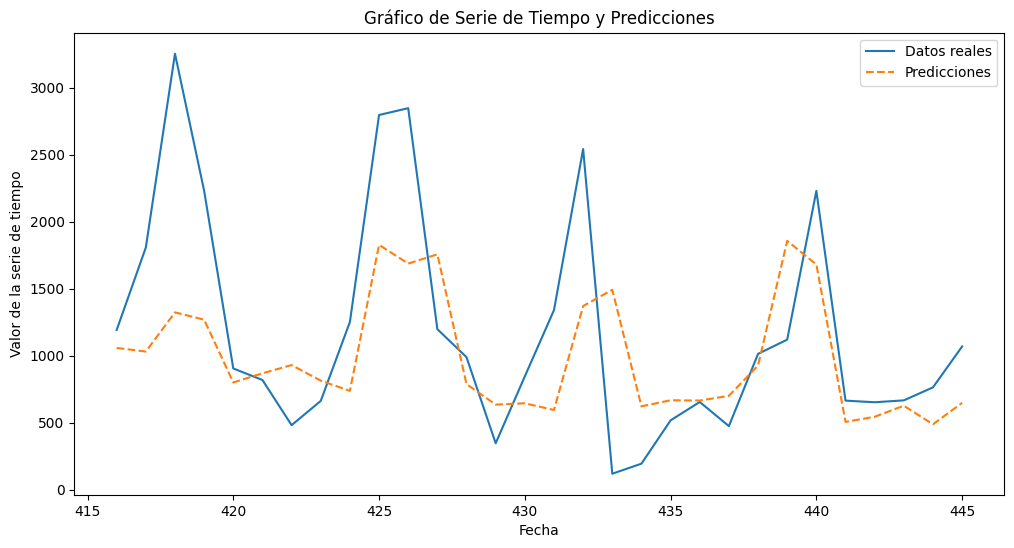

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000465 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9696
[LightGBM] [Info] Number of data points in the train set: 446, number of used features: 83
[LightGBM] [Info] Start training from score 747.210762
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

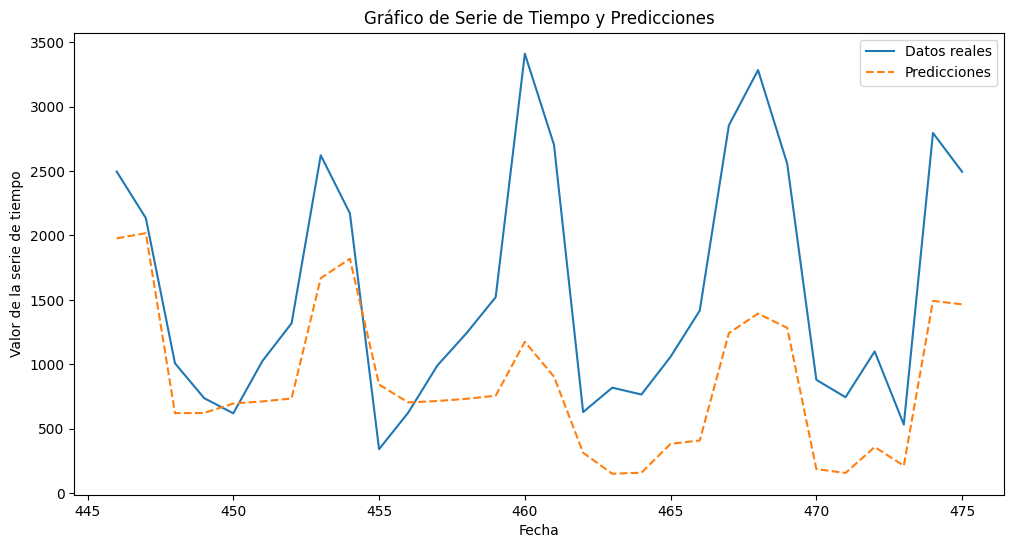

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000517 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10345
[LightGBM] [Info] Number of data points in the train set: 476, number of used features: 83
[LightGBM] [Info] Start training from score 798.655462
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

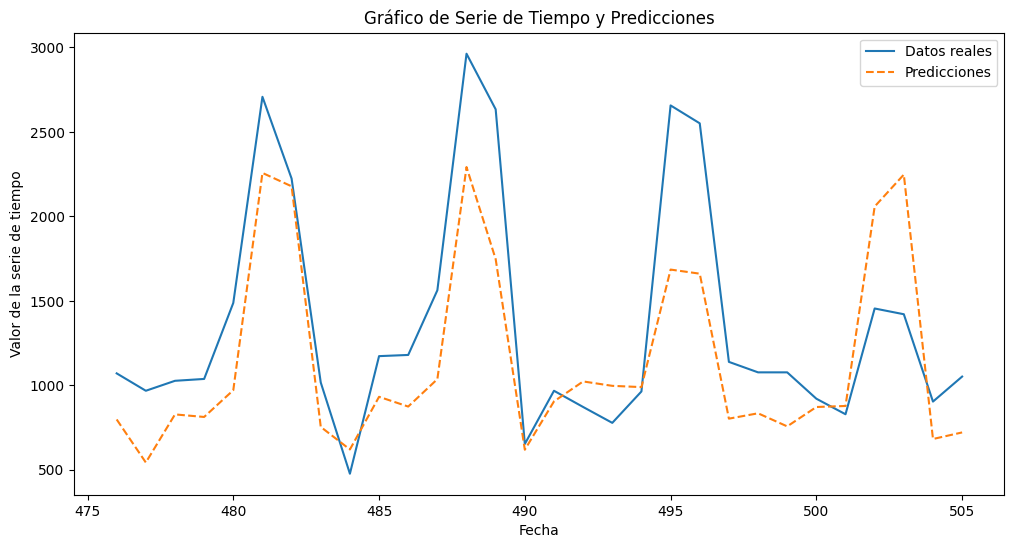

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11001
[LightGBM] [Info] Number of data points in the train set: 506, number of used features: 83
[LightGBM] [Info] Start training from score 832.033597
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

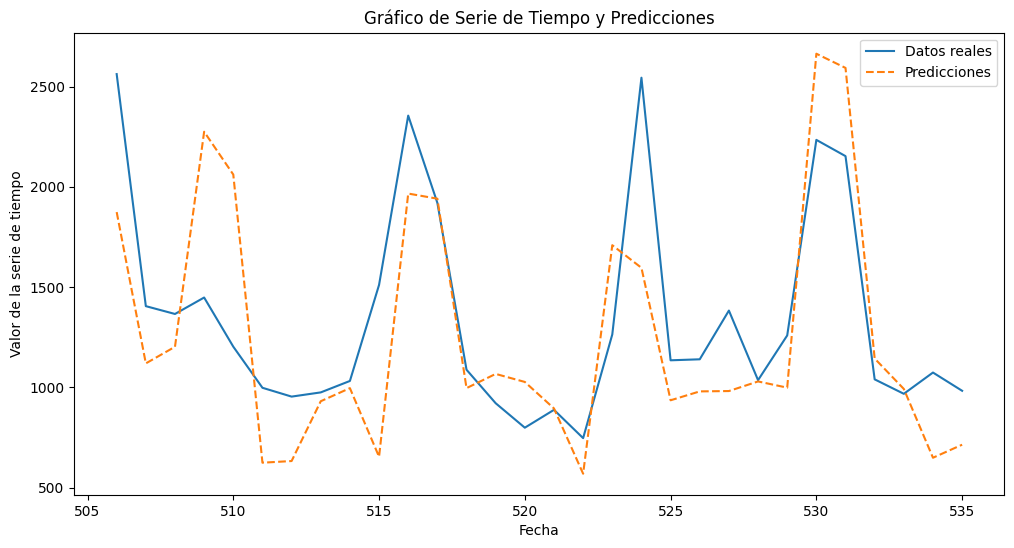

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000475 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11723
[LightGBM] [Info] Number of data points in the train set: 536, number of used features: 83
[LightGBM] [Info] Start training from score 860.809701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

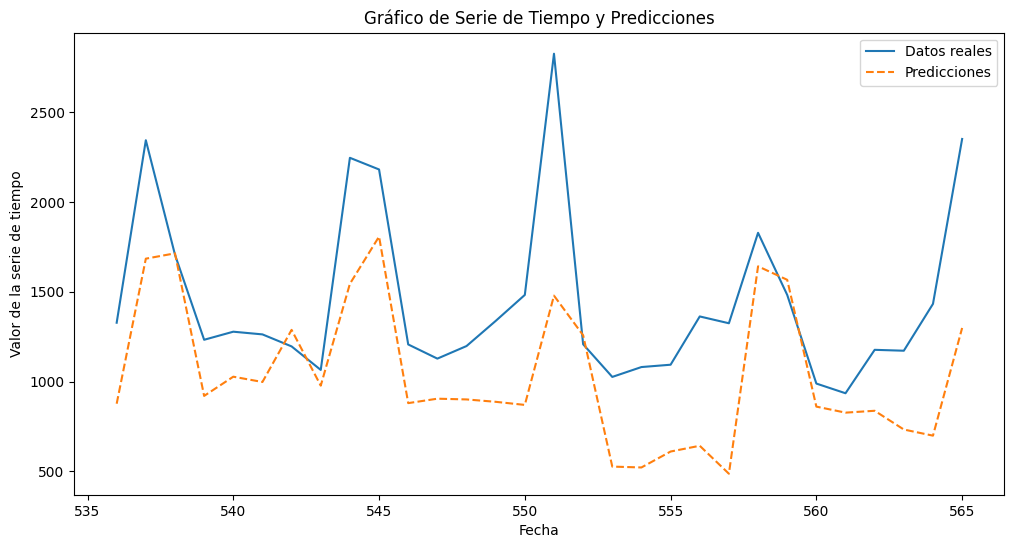

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000740 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12372
[LightGBM] [Info] Number of data points in the train set: 566, number of used features: 83
[LightGBM] [Info] Start training from score 892.024735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

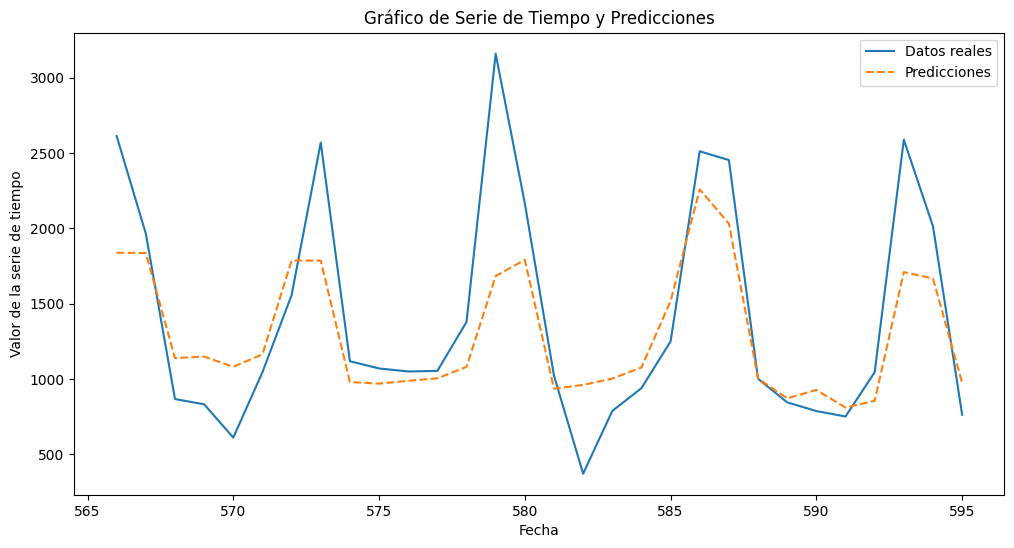

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000665 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13106
[LightGBM] [Info] Number of data points in the train set: 596, number of used features: 83
[LightGBM] [Info] Start training from score 917.911074
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

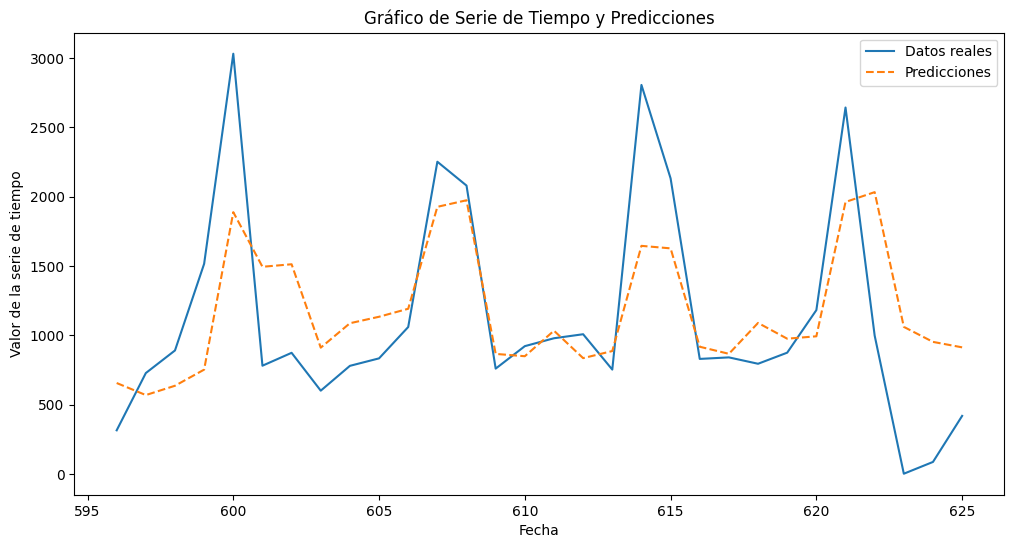

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000705 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13877
[LightGBM] [Info] Number of data points in the train set: 626, number of used features: 83
[LightGBM] [Info] Start training from score 927.875399
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

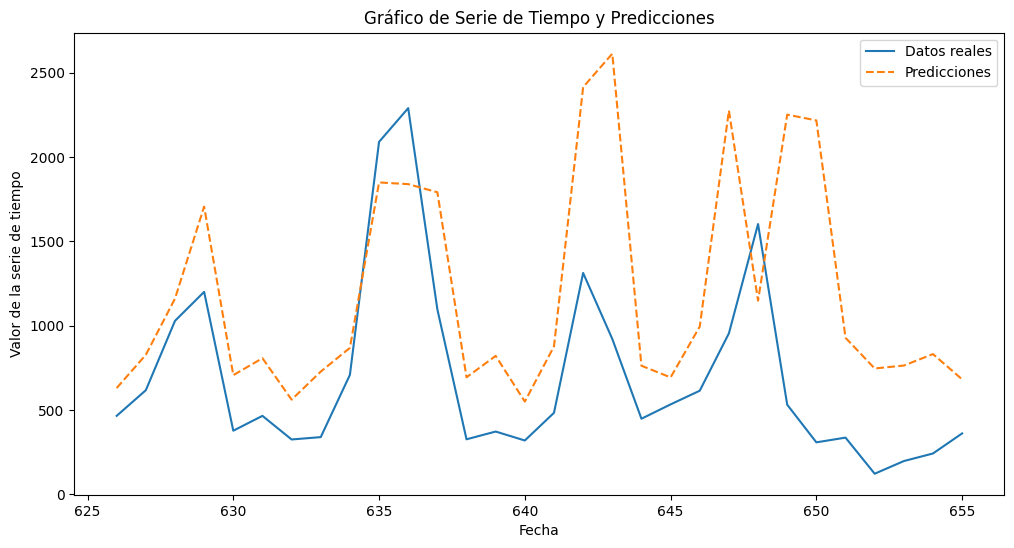

Model: LGBM_Poisson
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9055
[LightGBM] [Info] Number of data points in the train set: 416, number of used features: 83
[LightGBM] [Info] Start training from score 6.572847
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

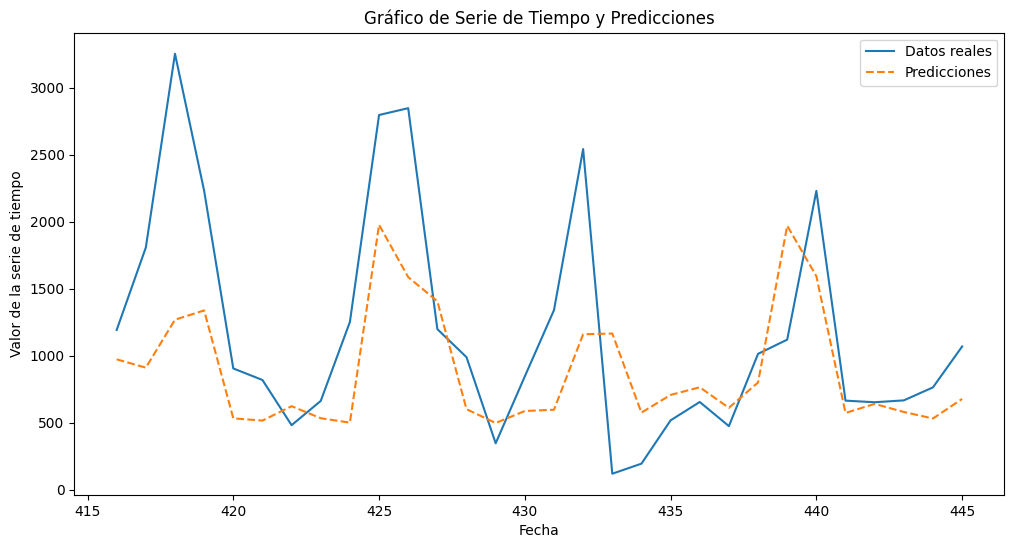

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9696
[LightGBM] [Info] Number of data points in the train set: 446, number of used features: 83
[LightGBM] [Info] Start training from score 6.616347
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

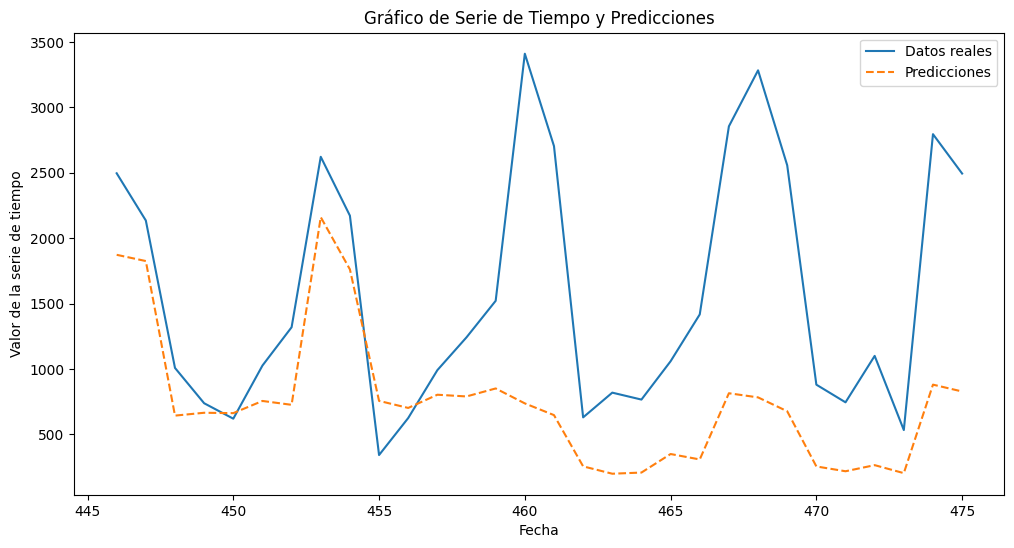

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000563 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10345
[LightGBM] [Info] Number of data points in the train set: 476, number of used features: 83
[LightGBM] [Info] Start training from score 6.682930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

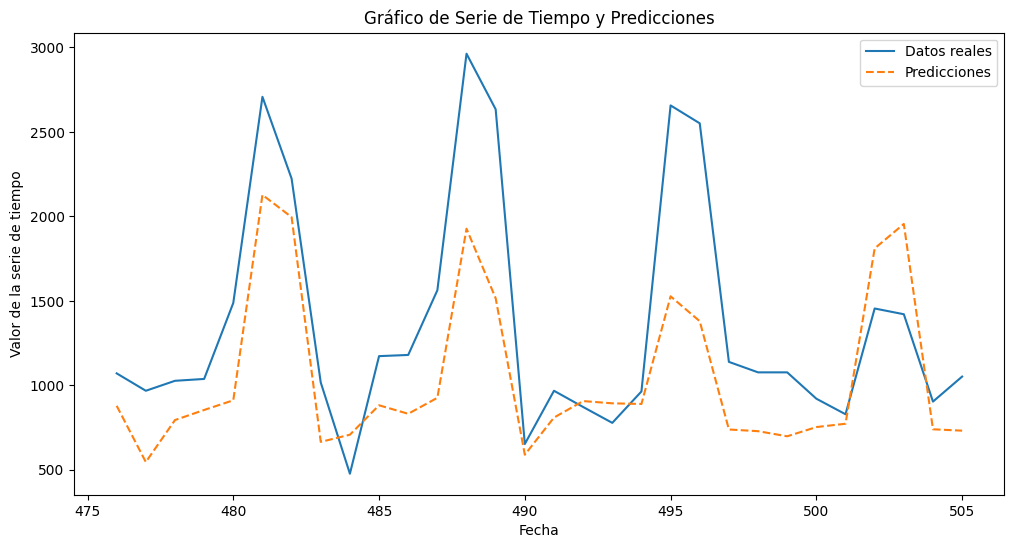

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000430 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11001
[LightGBM] [Info] Number of data points in the train set: 506, number of used features: 83
[LightGBM] [Info] Start training from score 6.723873
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

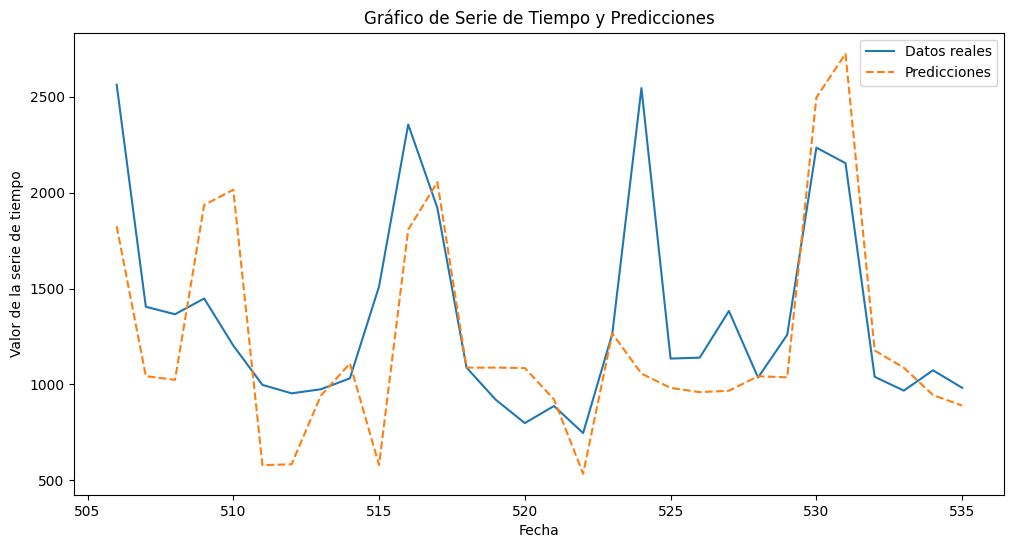

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11723
[LightGBM] [Info] Number of data points in the train set: 536, number of used features: 83
[LightGBM] [Info] Start training from score 6.757873
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

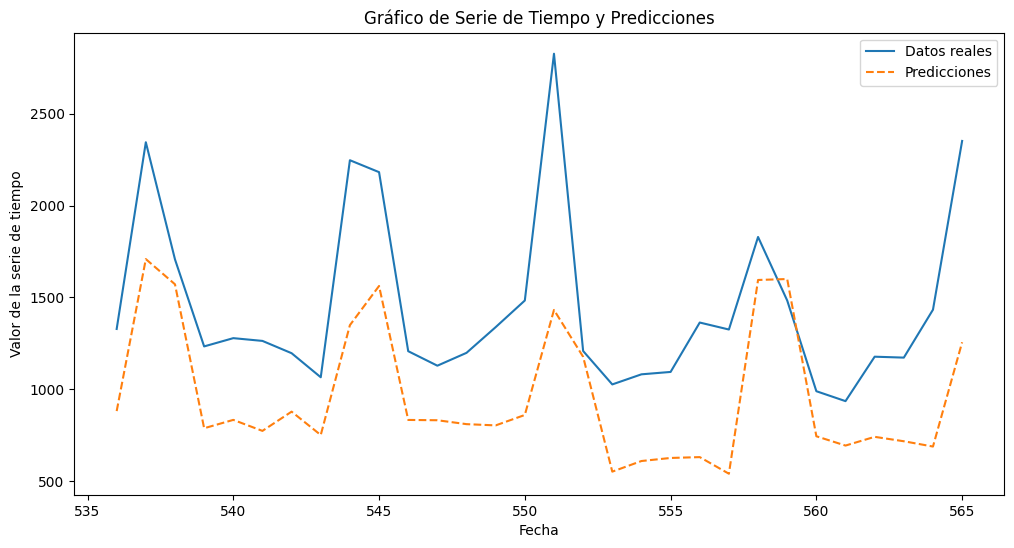

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12372
[LightGBM] [Info] Number of data points in the train set: 566, number of used features: 83
[LightGBM] [Info] Start training from score 6.793494
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

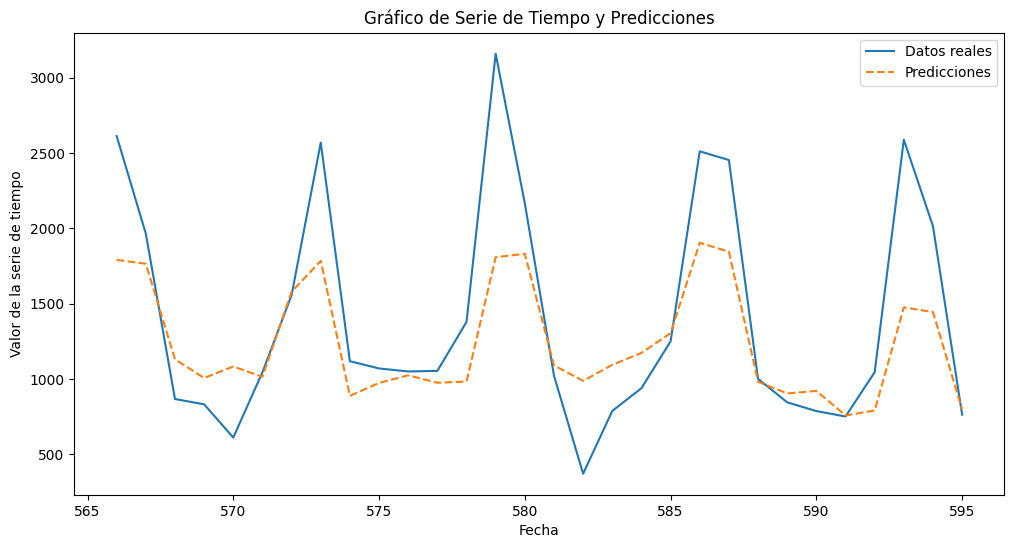

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13106
[LightGBM] [Info] Number of data points in the train set: 596, number of used features: 83
[LightGBM] [Info] Start training from score 6.822101
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

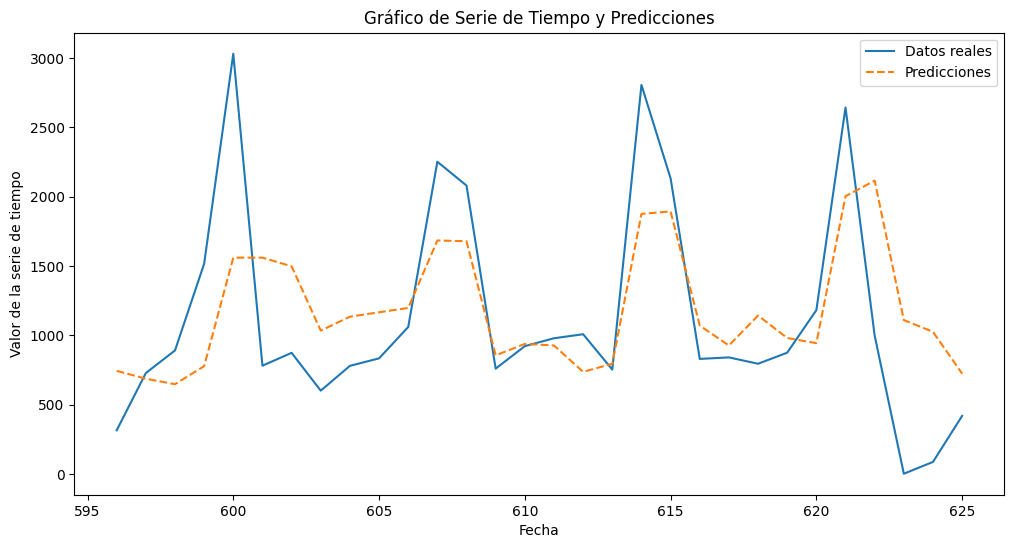

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000657 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13877
[LightGBM] [Info] Number of data points in the train set: 626, number of used features: 83
[LightGBM] [Info] Start training from score 6.832897
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

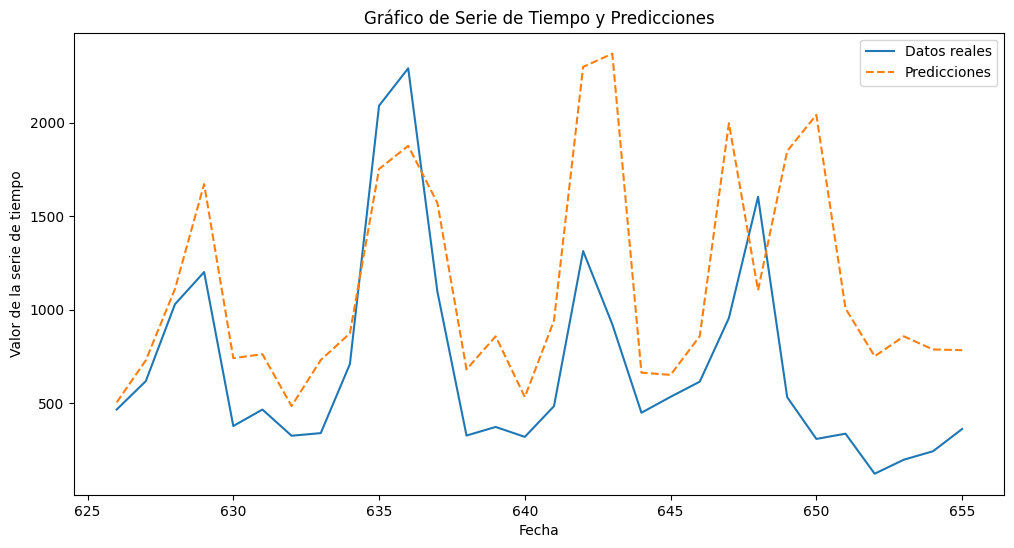

Model: LGBM_Mape
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000534 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9055
[LightGBM] [Info] Number of data points in the train set: 416, number of used features: 83
[LightGBM] [Info] Start training from score 206.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

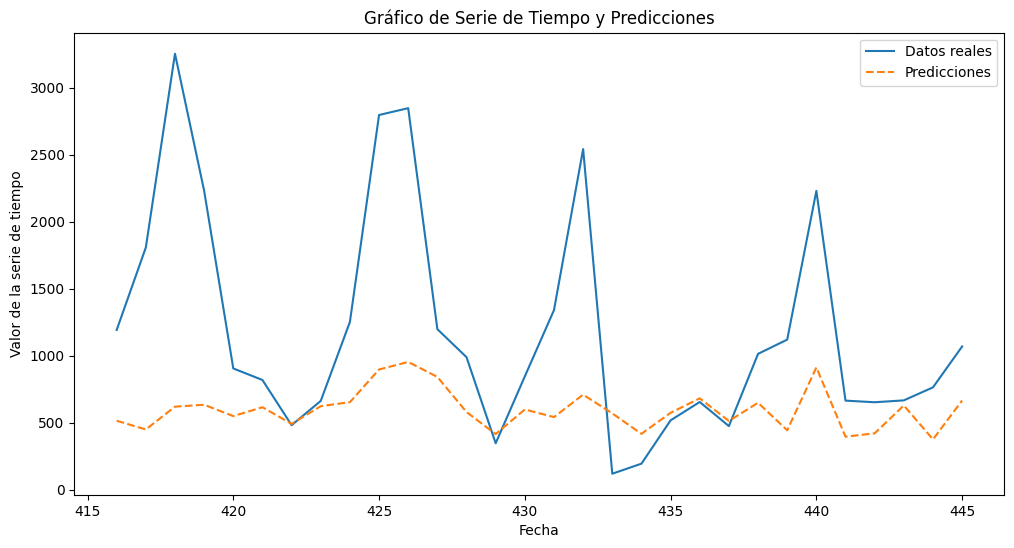

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9696
[LightGBM] [Info] Number of data points in the train set: 446, number of used features: 83
[LightGBM] [Info] Start training from score 209.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

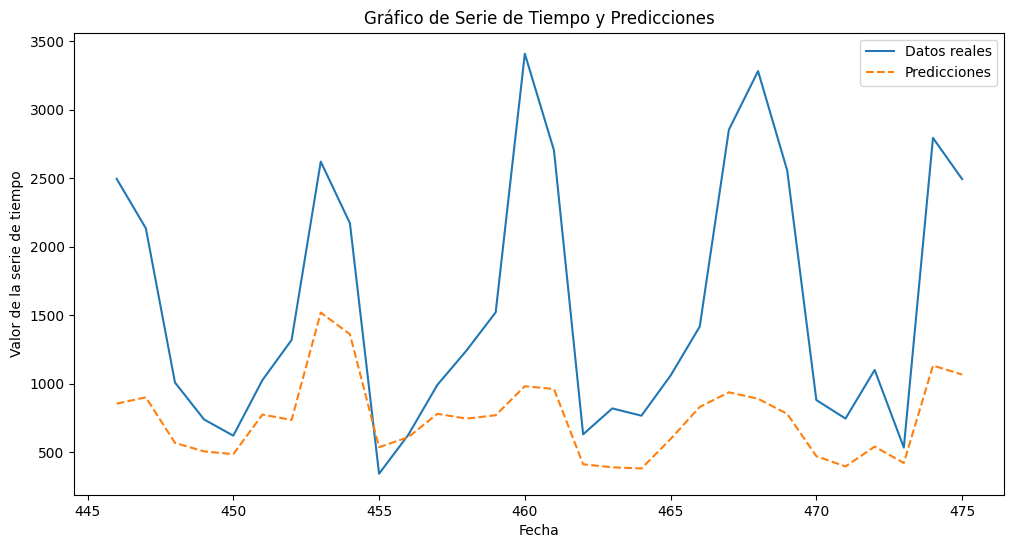

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000469 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10345
[LightGBM] [Info] Number of data points in the train set: 476, number of used features: 83
[LightGBM] [Info] Start training from score 217.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

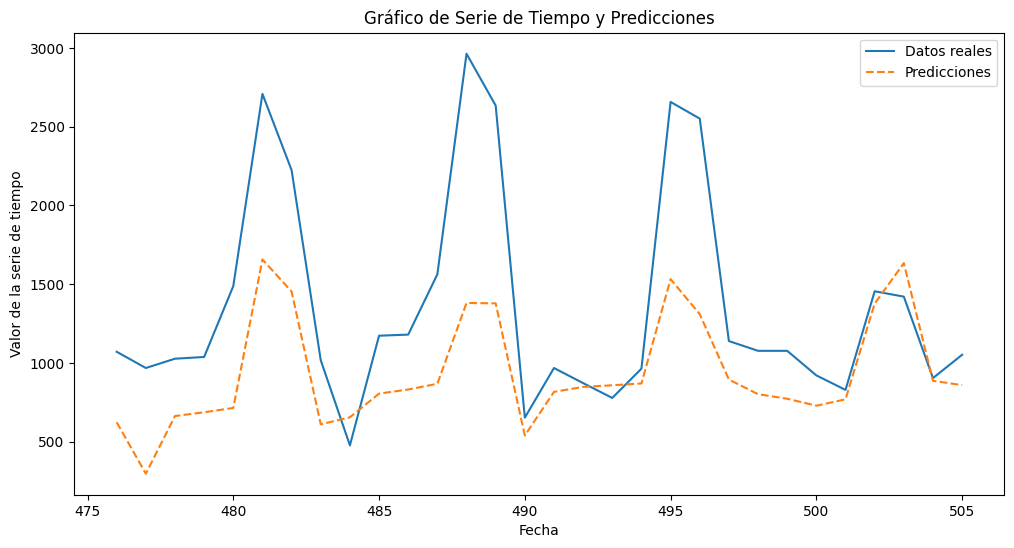

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11001
[LightGBM] [Info] Number of data points in the train set: 506, number of used features: 83
[LightGBM] [Info] Start training from score 220.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

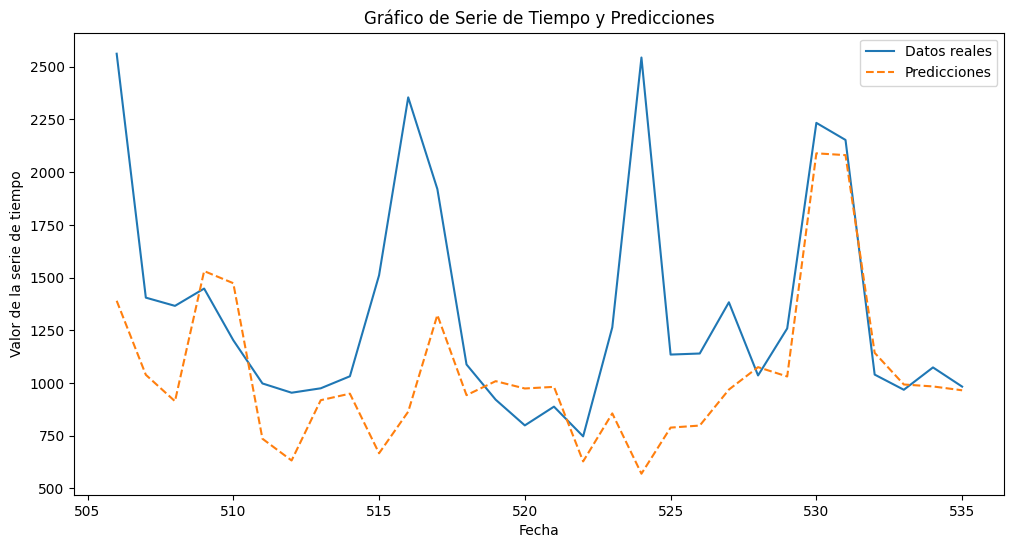

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000468 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11723
[LightGBM] [Info] Number of data points in the train set: 536, number of used features: 83
[LightGBM] [Info] Start training from score 222.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

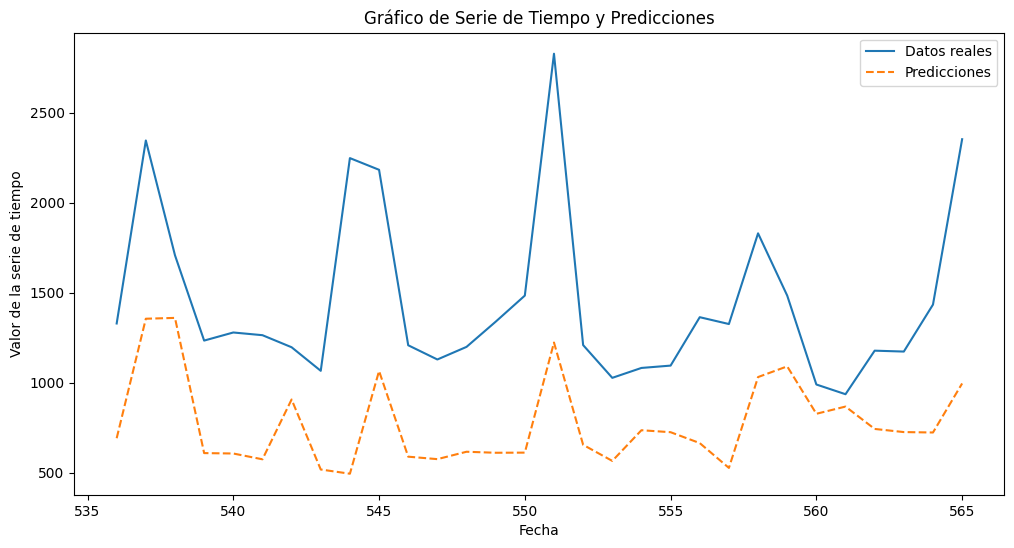

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000761 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12372
[LightGBM] [Info] Number of data points in the train set: 566, number of used features: 83
[LightGBM] [Info] Start training from score 227.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

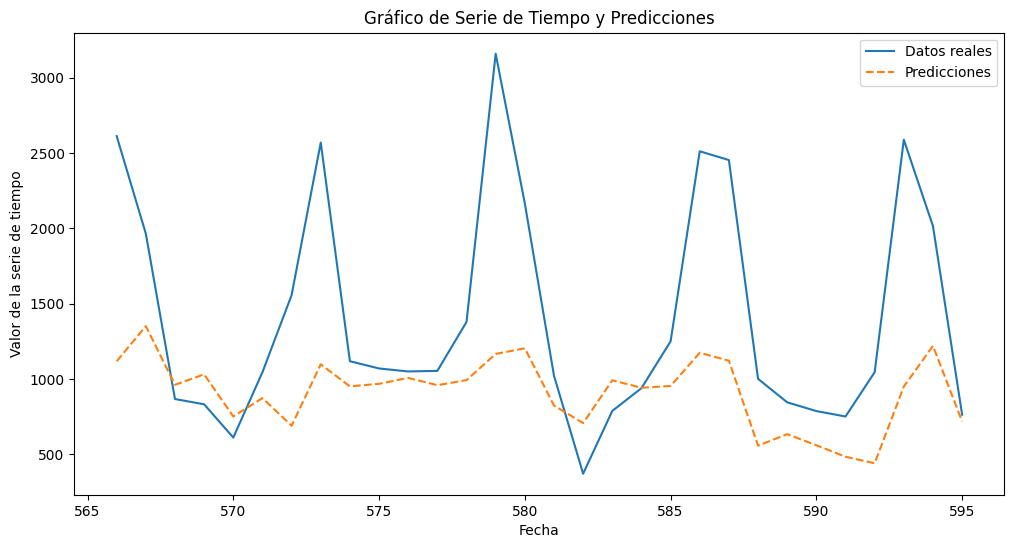

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000726 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13106
[LightGBM] [Info] Number of data points in the train set: 596, number of used features: 83
[LightGBM] [Info] Start training from score 233.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

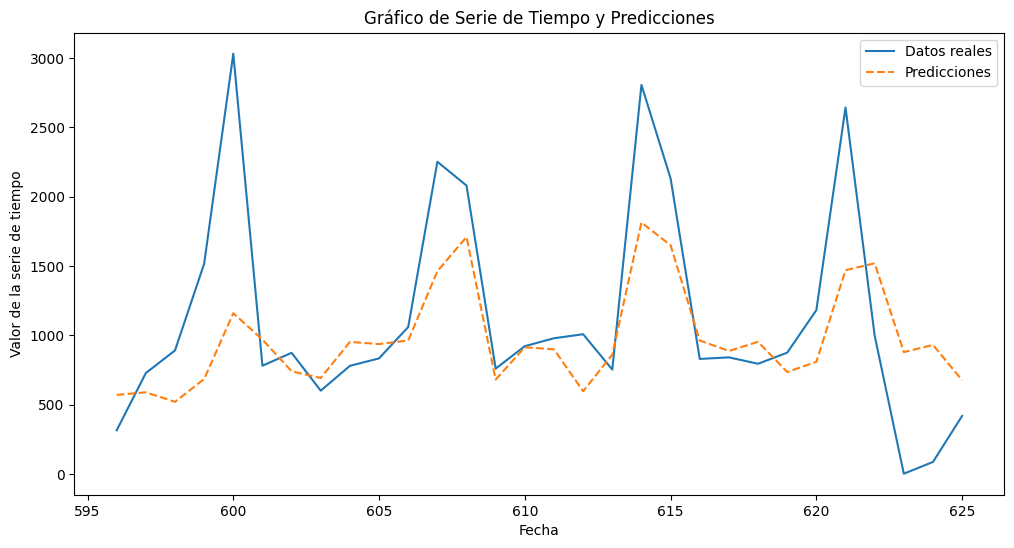

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000711 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13877
[LightGBM] [Info] Number of data points in the train set: 626, number of used features: 83
[LightGBM] [Info] Start training from score 153.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

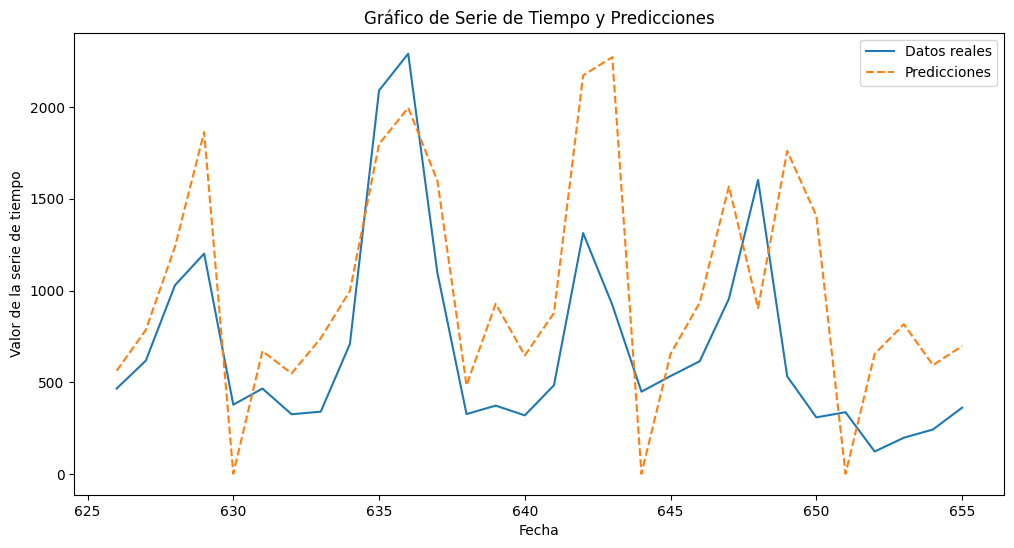

Model: LGBM_quantile
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9055
[LightGBM] [Info] Number of data points in the train set: 416, number of used features: 83
[LightGBM] [Info] Start training from score 1553.499878
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

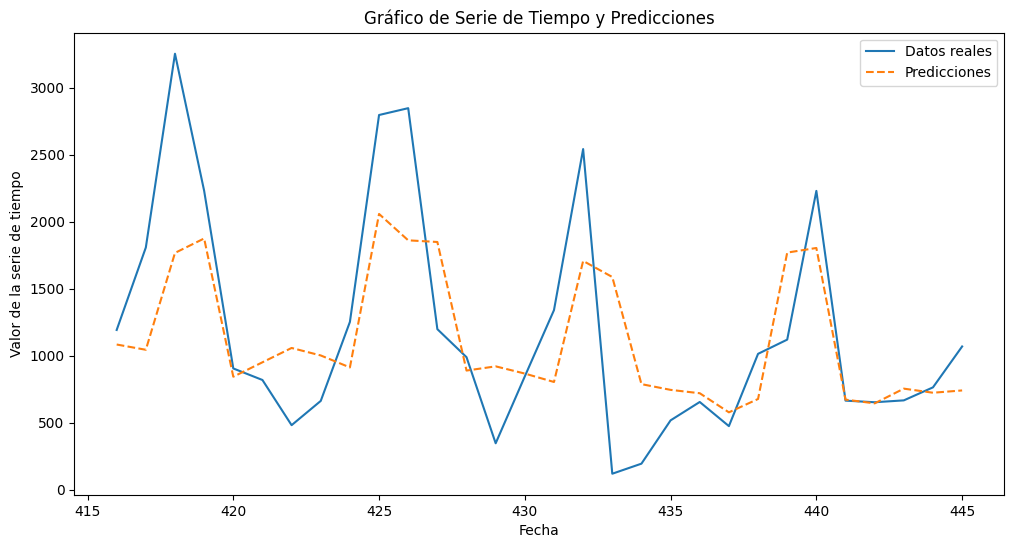

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000628 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9696
[LightGBM] [Info] Number of data points in the train set: 446, number of used features: 83
[LightGBM] [Info] Start training from score 1596.999634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

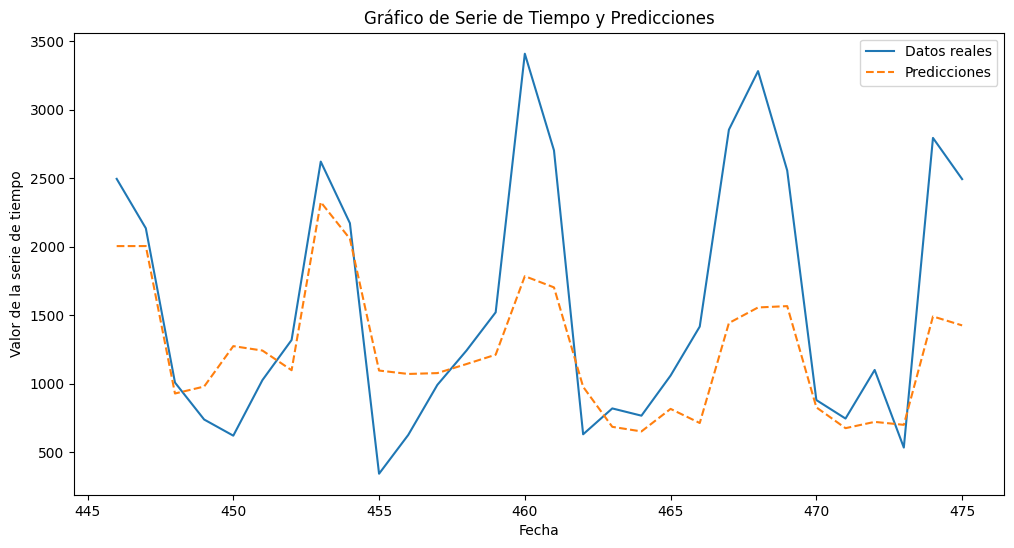

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10345
[LightGBM] [Info] Number of data points in the train set: 476, number of used features: 83
[LightGBM] [Info] Start training from score 1719.499756
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

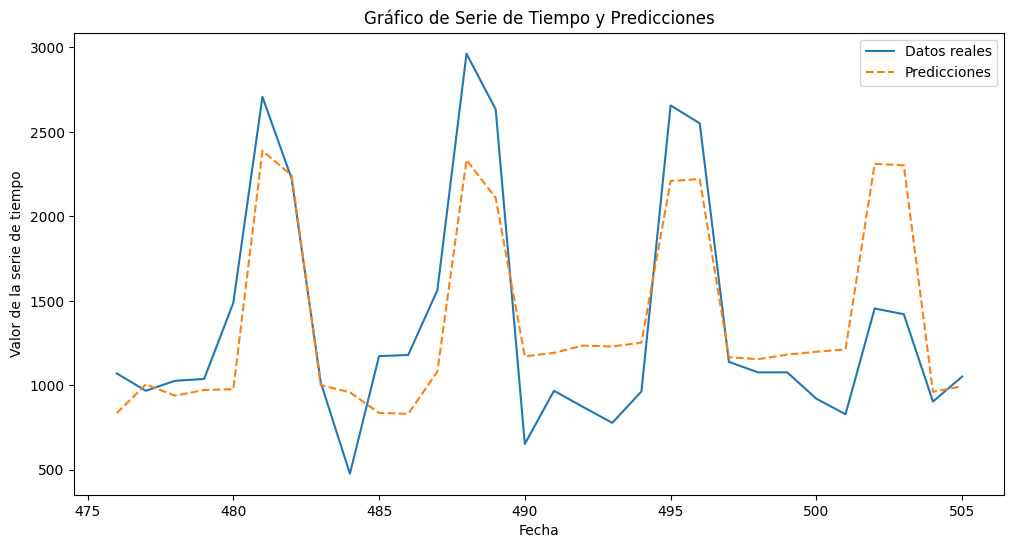

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000534 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11001
[LightGBM] [Info] Number of data points in the train set: 506, number of used features: 83
[LightGBM] [Info] Start training from score 1749.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

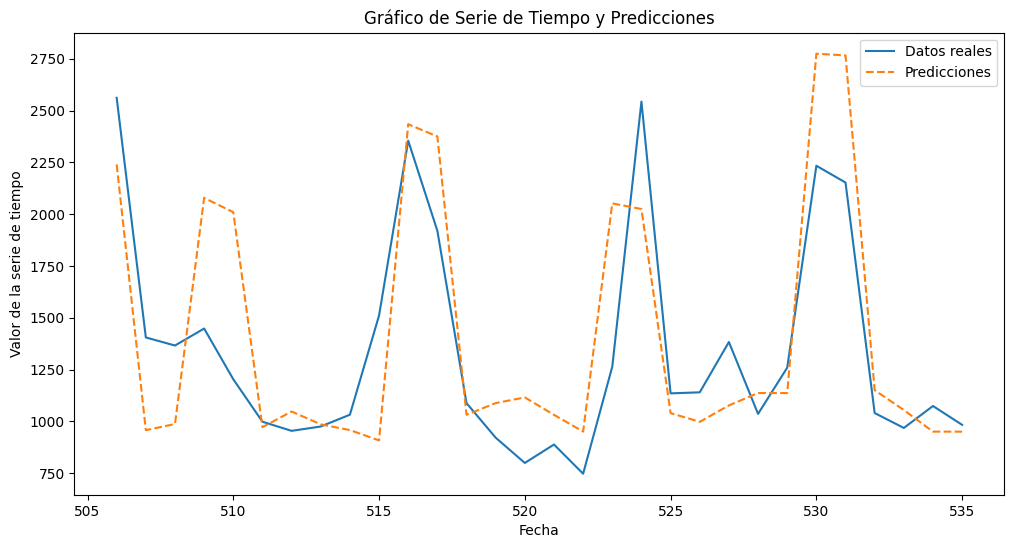

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000677 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11723
[LightGBM] [Info] Number of data points in the train set: 536, number of used features: 83
[LightGBM] [Info] Start training from score 1794.499634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

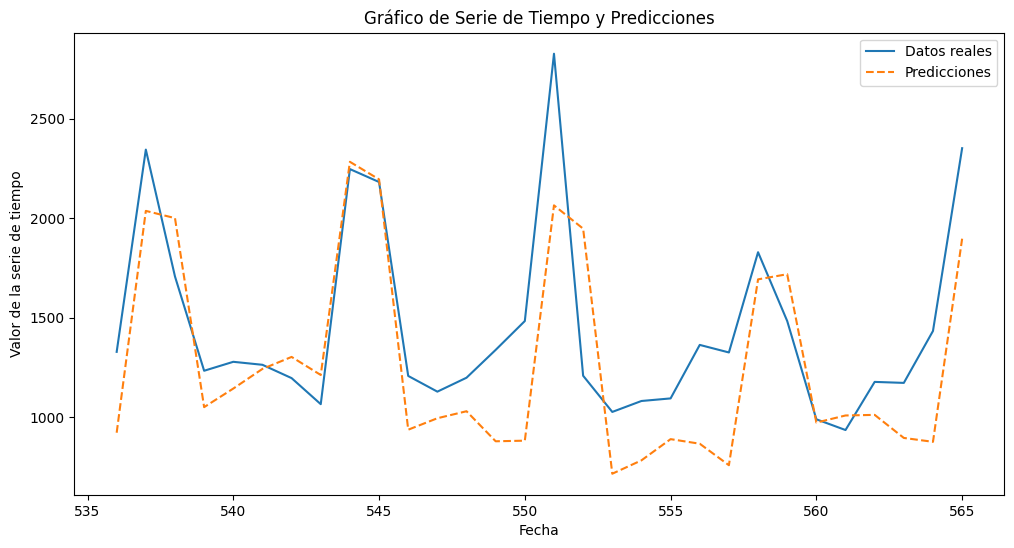

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000532 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12372
[LightGBM] [Info] Number of data points in the train set: 566, number of used features: 83
[LightGBM] [Info] Start training from score 1848.999512
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

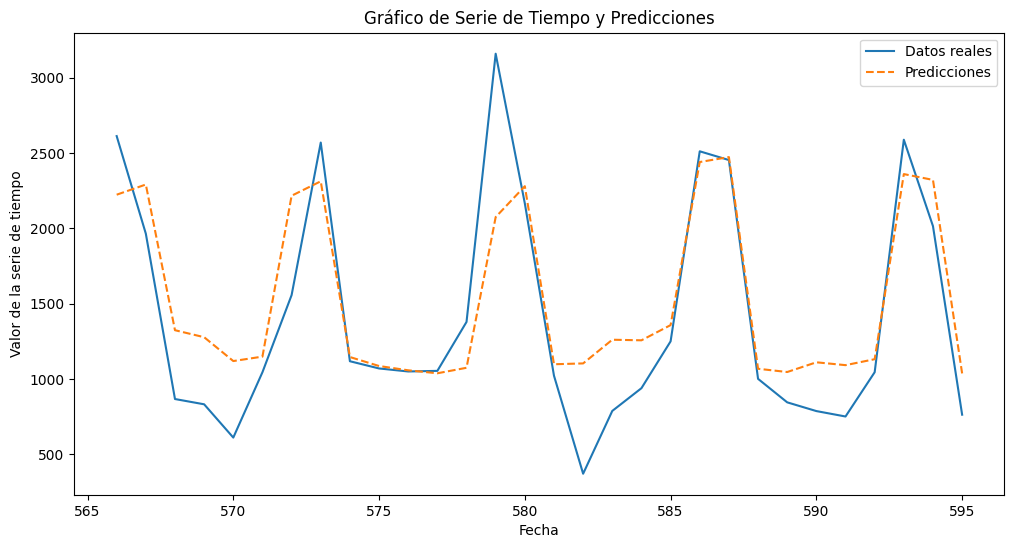

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000516 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13106
[LightGBM] [Info] Number of data points in the train set: 596, number of used features: 83
[LightGBM] [Info] Start training from score 1949.999634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

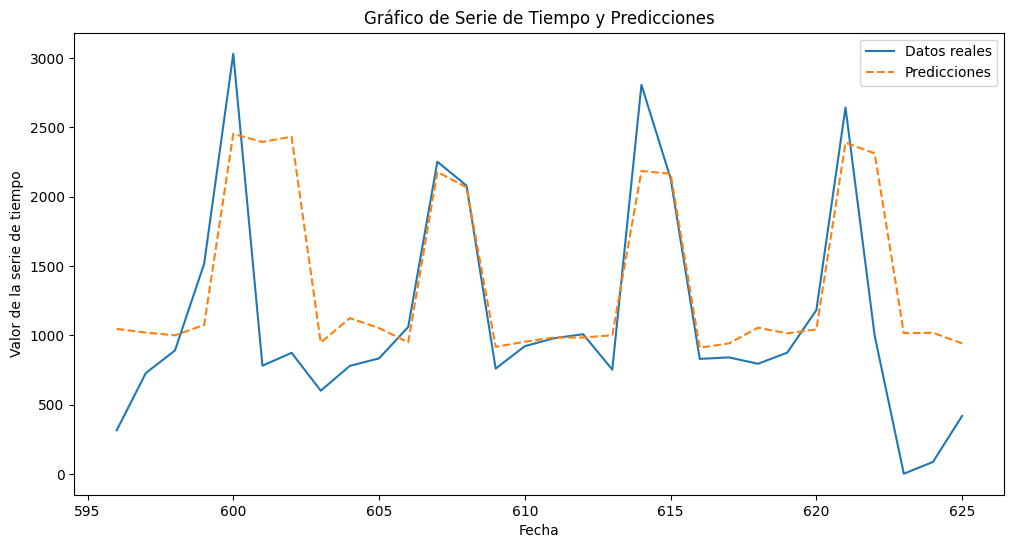

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000710 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13877
[LightGBM] [Info] Number of data points in the train set: 626, number of used features: 83
[LightGBM] [Info] Start training from score 1994.499756
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

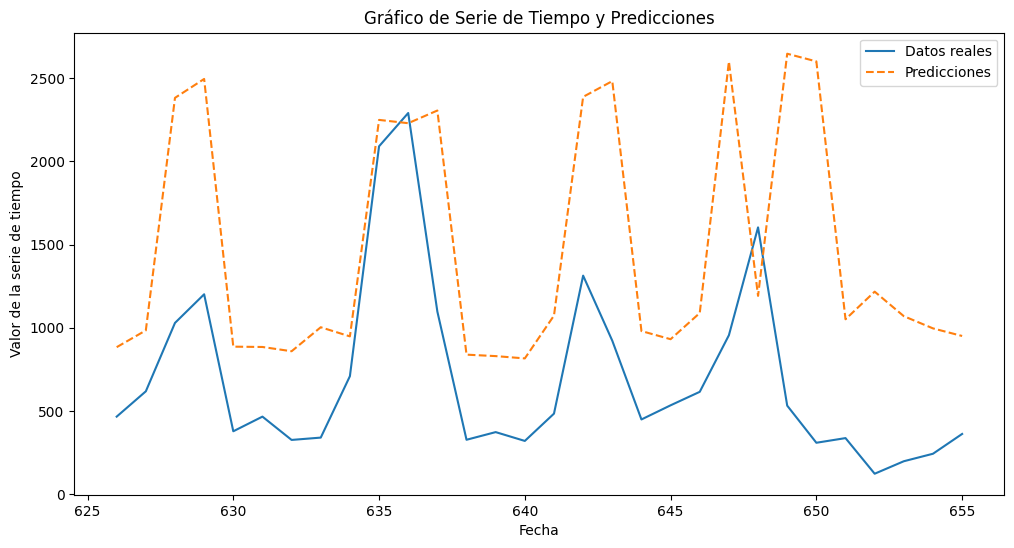

Model: LinearRegression
Fold 0: Best mape score: 1.4736638466410694


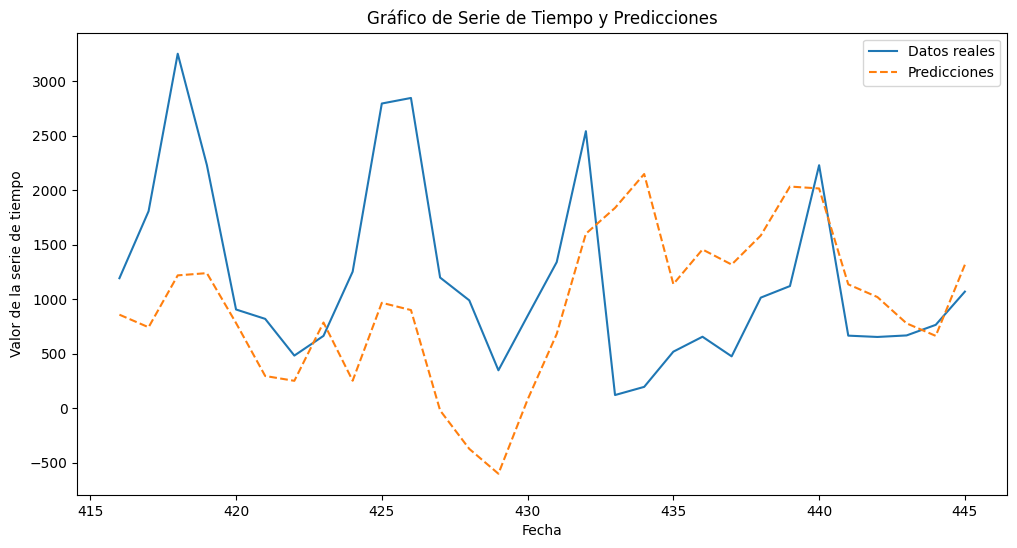

Fold 1: Best mape score: 0.49972793939252674


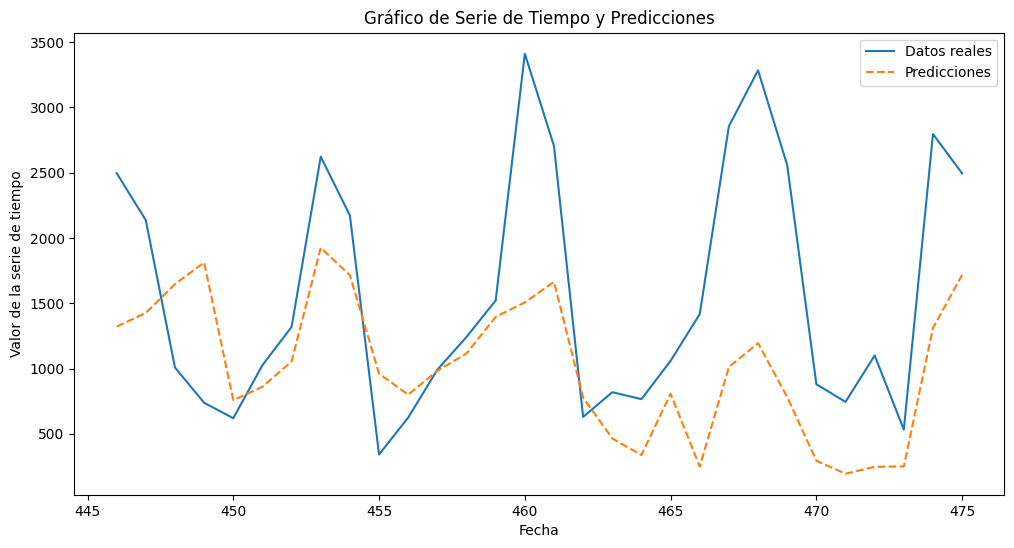

Fold 2: Best mape score: 0.4044777601404974


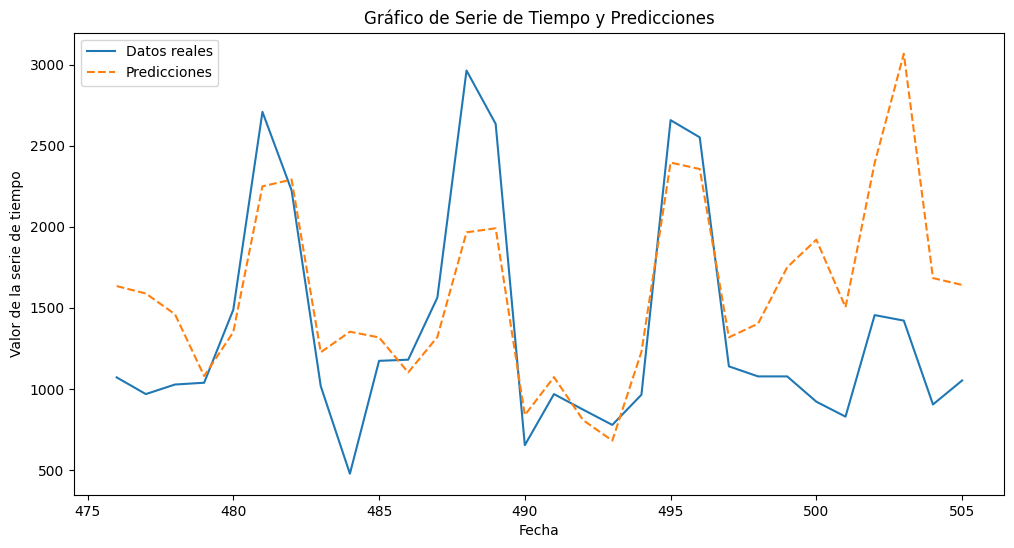

Fold 3: Best mape score: 0.2749901226375042


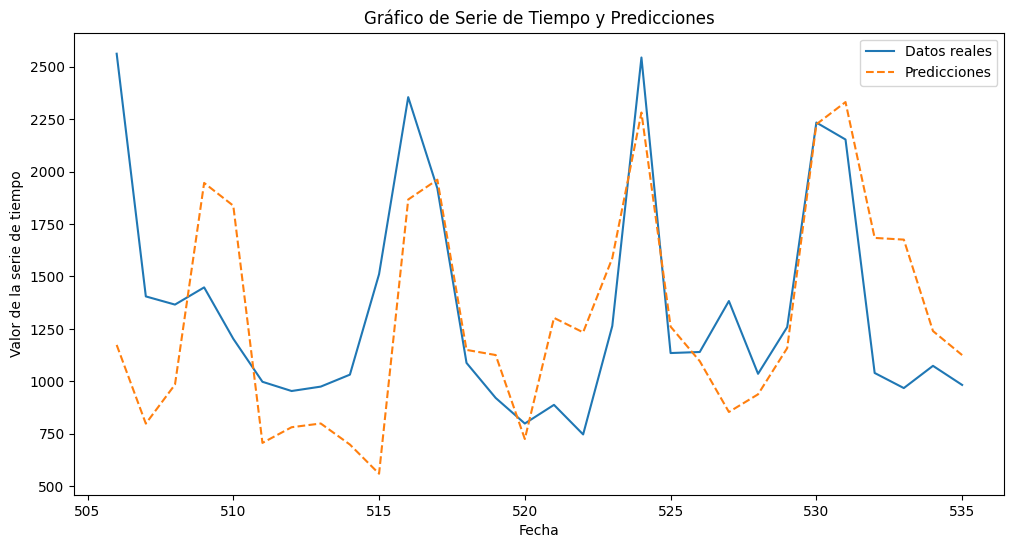

Fold 4: Best mape score: 0.37550278465618997


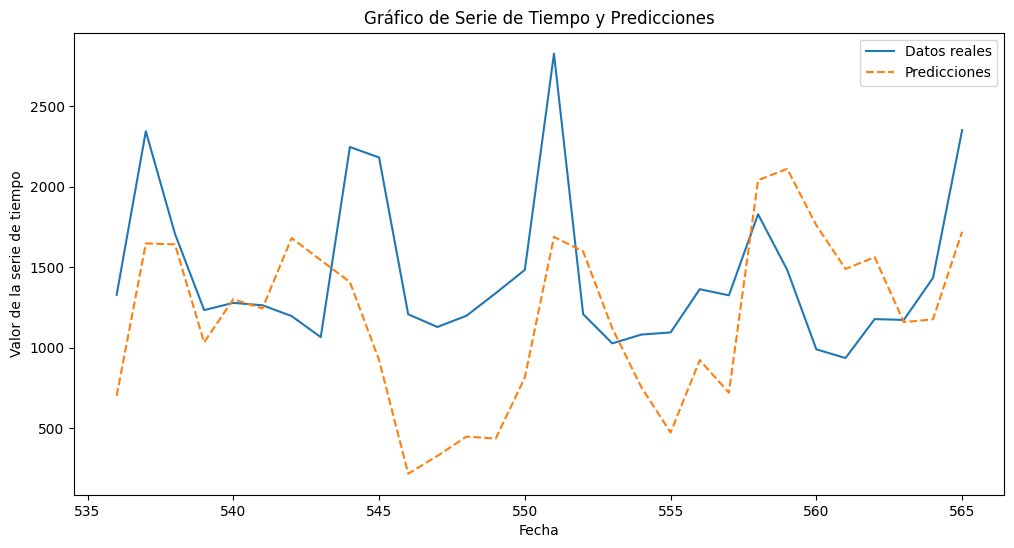

Fold 5: Best mape score: 0.6497919874946668


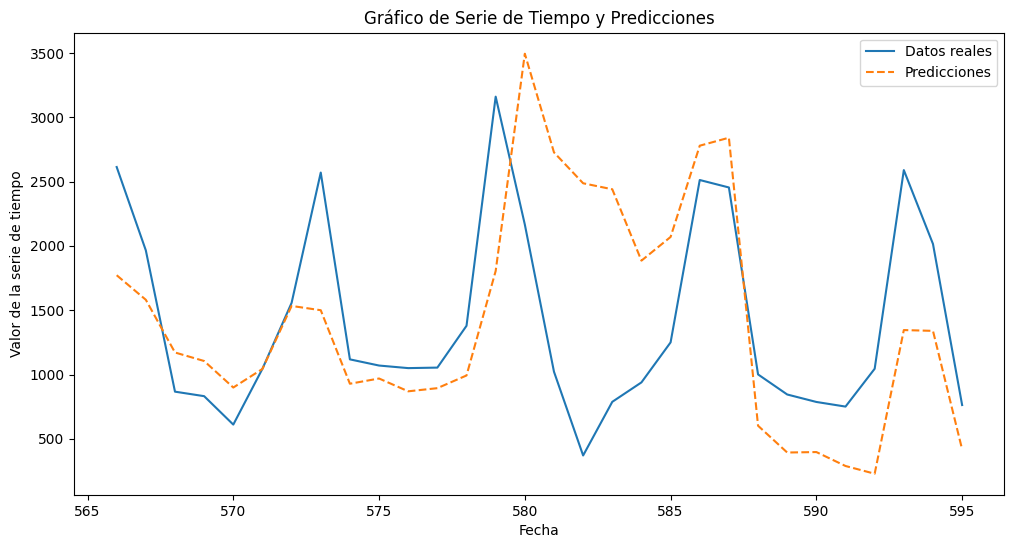

Fold 6: Best mape score: 1.9513400126322842


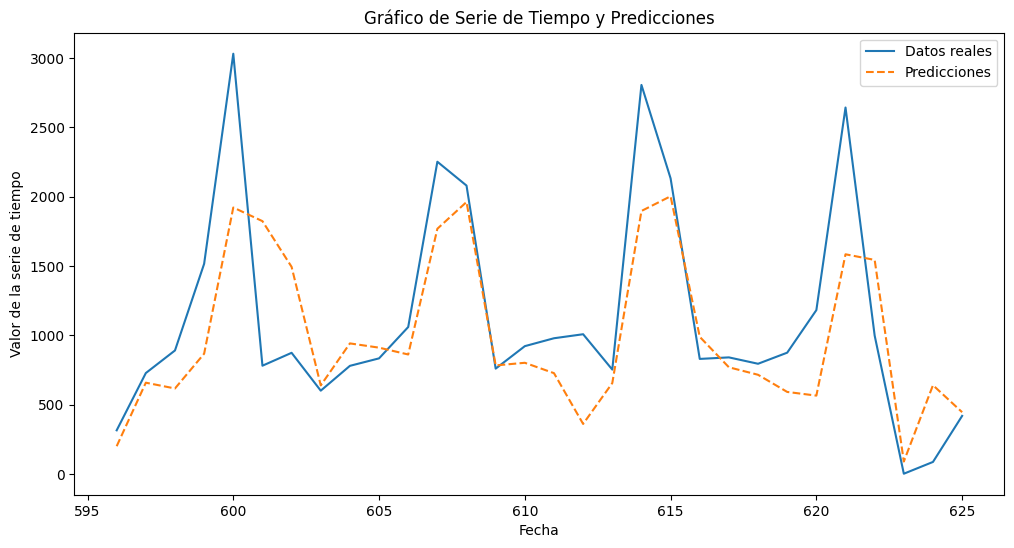

Fold 7: Best mape score: 1.261840129688896


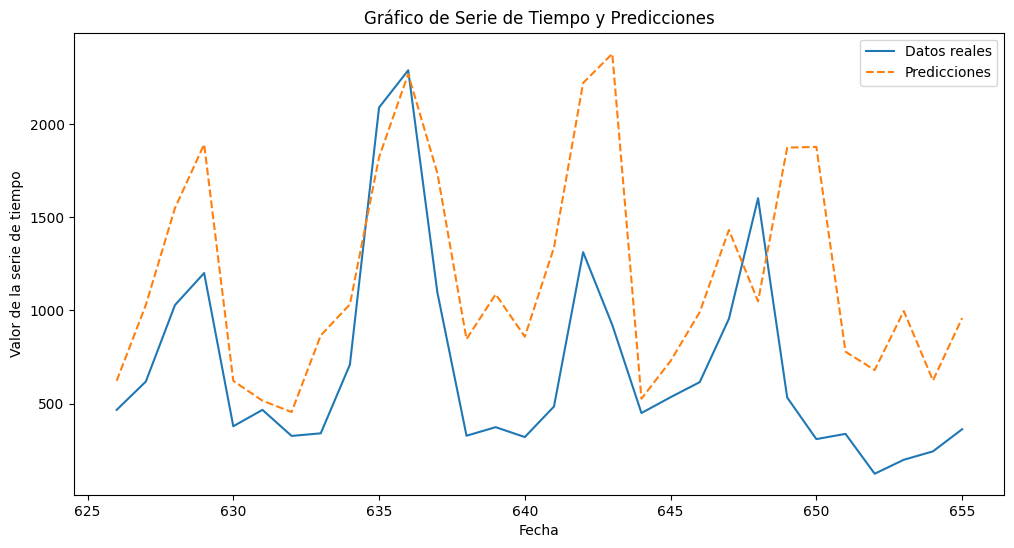

Model: PoissonRegression
Fold 0: Best mape score: 0.6315562884733875


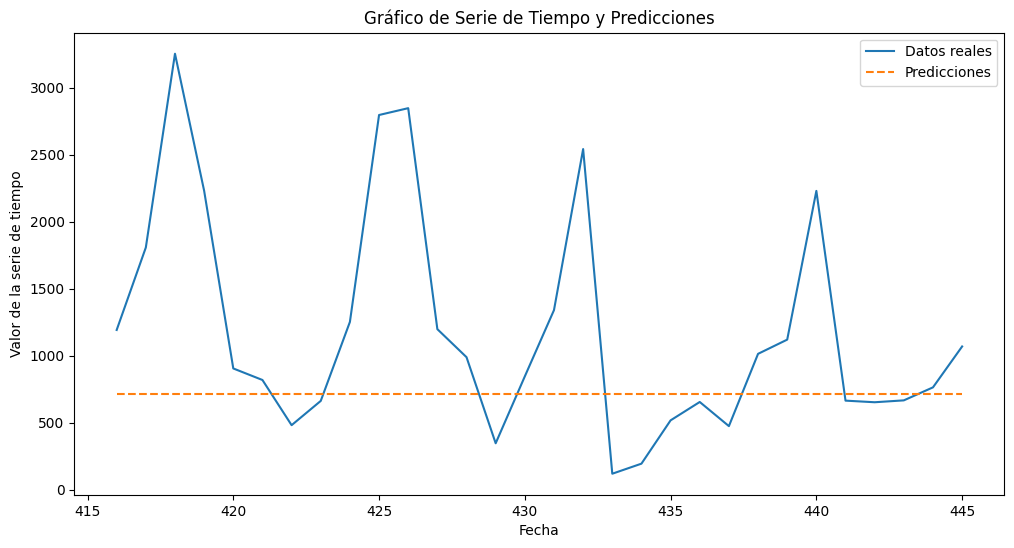

Fold 1: Best mape score: 0.4511539049427378


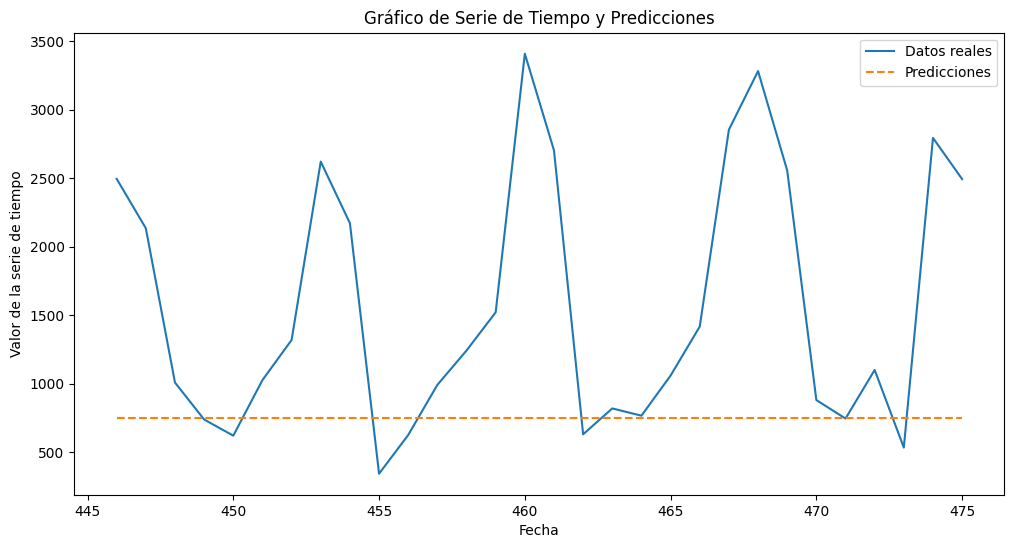

Fold 2: Best mape score: 0.34790222799874415


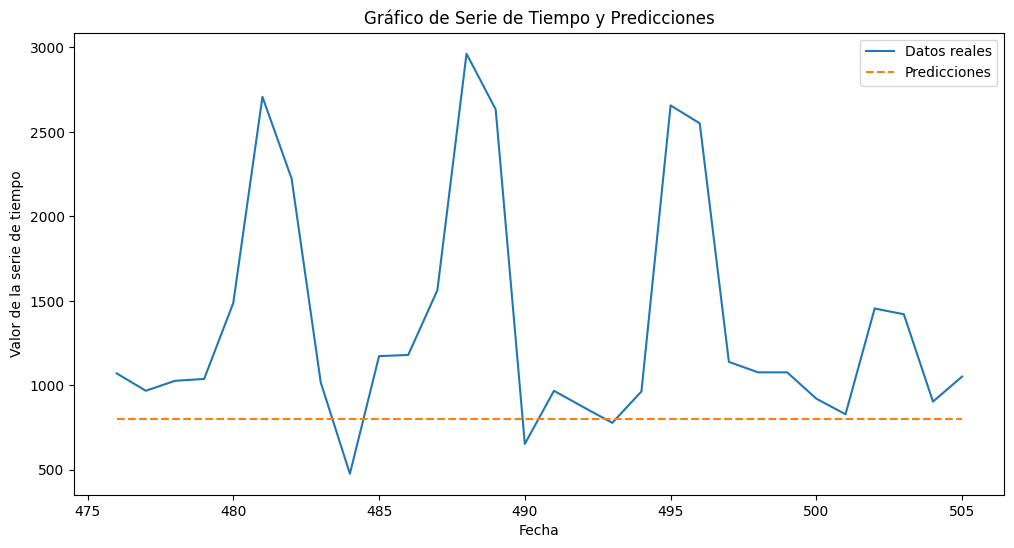

Fold 3: Best mape score: 0.3167189963378675


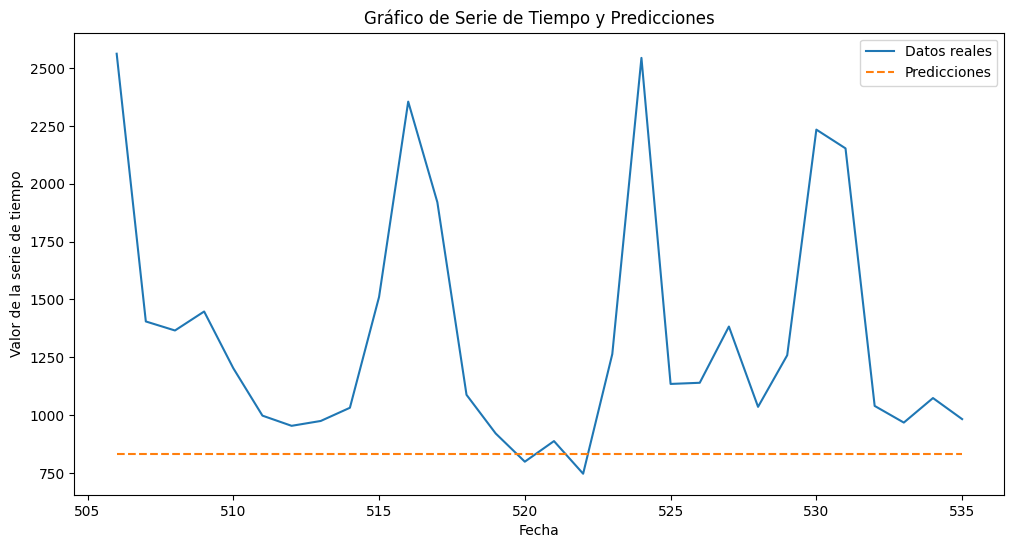

Fold 4: Best mape score: 0.35692598399616965


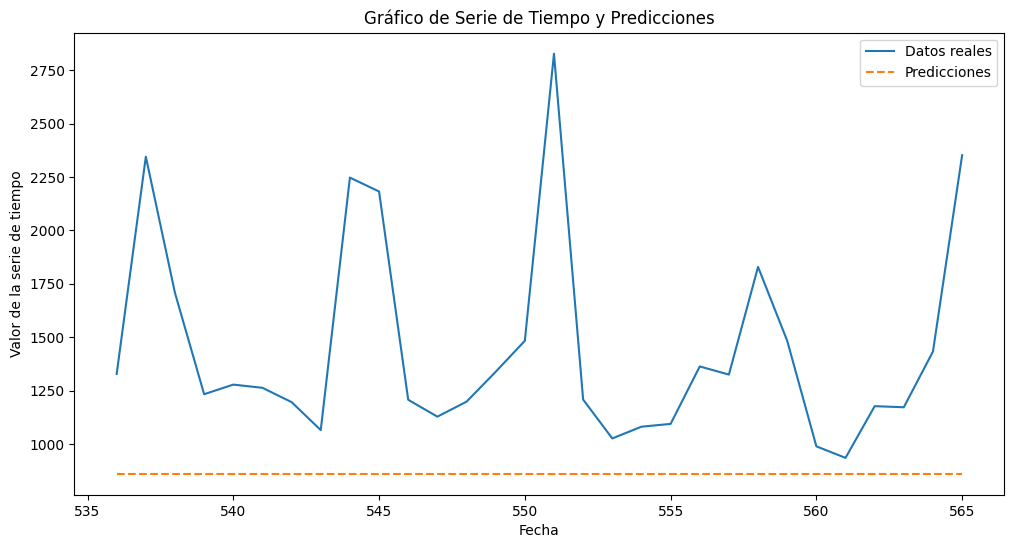

Fold 5: Best mape score: 0.3539659418319563


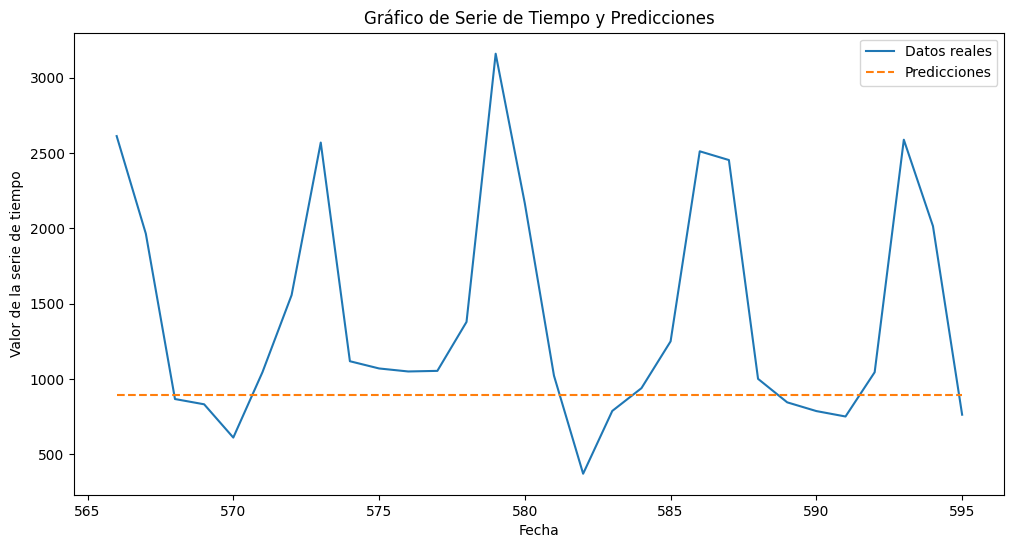

Fold 6: Best mape score: 15.916394745717058


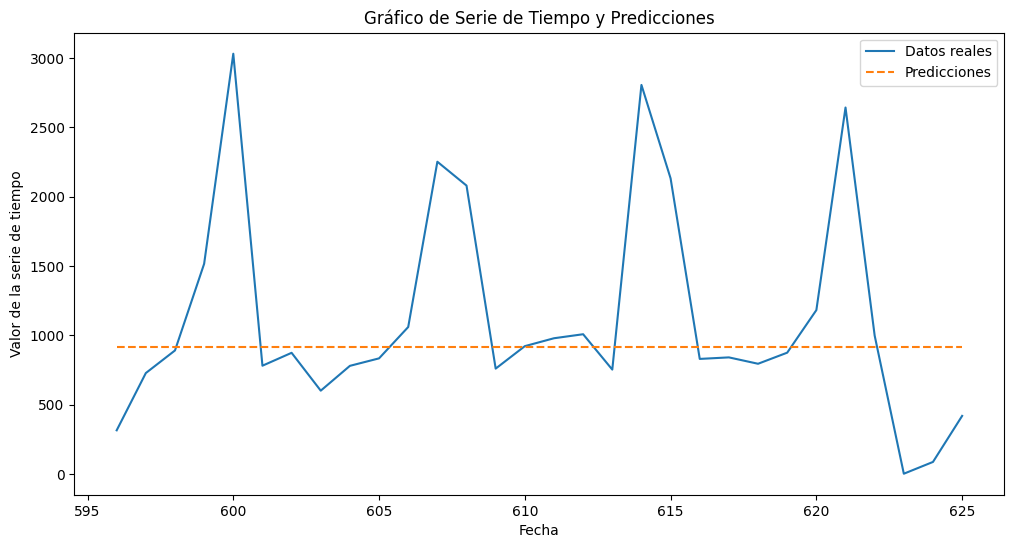

Fold 7: Best mape score: 1.2589650268139918


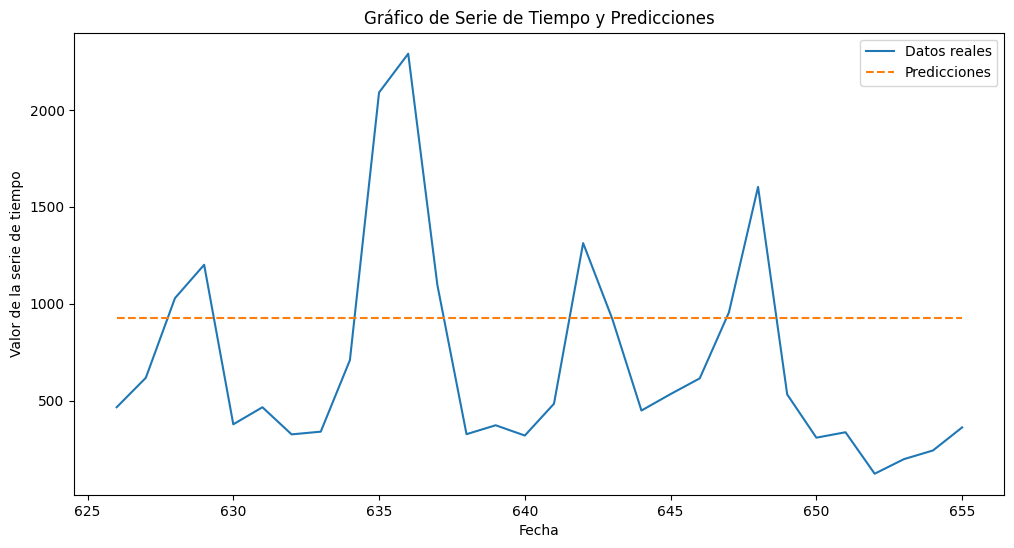

Model: xgb_custom
Fold 0: Best mape score: 0.49313793382019866


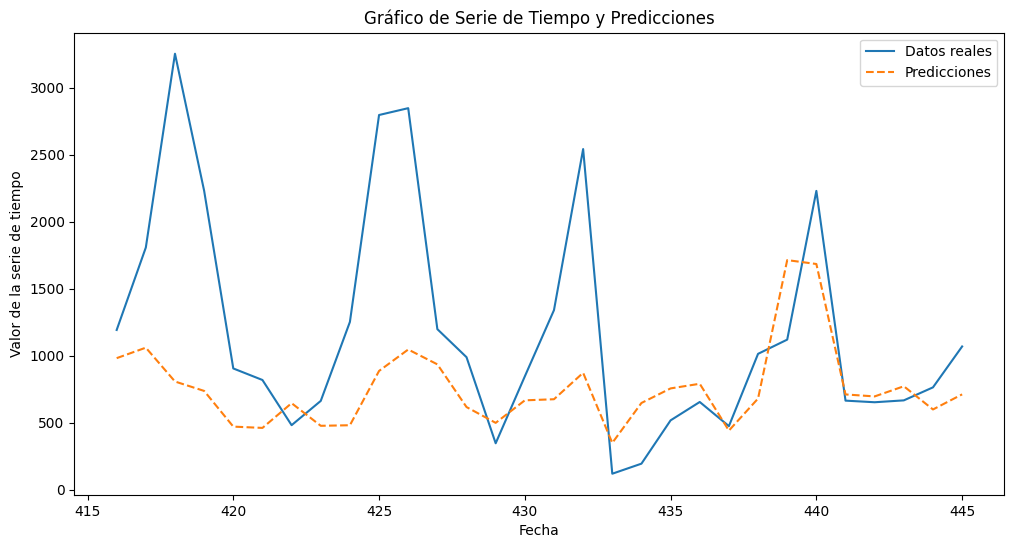

KeyboardInterrupt: 

In [24]:
train_get_score_cv(
    x_train=train_fe,
    y_train=y_train['rents'],
    models=models,
    k=8,
    pipeline_engine=data_pipeliene
)

## first model feature importance 

In [22]:
fe_imp = feature_importance_series(data_pipeliene.fit_transform(train_fe), y_train['rents'])

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000639 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14647
[LightGBM] [Info] Number of data points in the train set: 656, number of used features: 83
[LightGBM] [Info] Start training from score 917.467988
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

In [25]:
model_final = Pipeline(
[
    ('data_transformation', data_pipeliene),
    ('model', xgb.XGBRegressor(
        base_score=0.5, 
        booster='gbtree',    
        n_estimators=5000,
        objective='count:poisson',
        max_depth=9,
        learning_rate=0.01,
    ))
])

In [26]:
model_final = model_final.fit(train_fe, y_train['rents'])